In [1]:
using StatsPlots, Plots
using Distributions
using Statistics
using ARFIMA
using StatsBase

In [2]:
plot();

# Zad 1

In [5]:
φ₁=0.2
φ₂=0.4
σ²=0.5
N=1000

1000

In [6]:
γ(X,h)=begin
    n=length(X)
    x=mean(X)
    sum(@. (X[h+1:end]-x)*(X[1:n-h]-x) )/n
end

γ (generic function with 1 method)

In [8]:
X = arfima(N, √σ², nothing, SVector(φ₁,φ₂)) # ARFIMA(2,0,0)


1000-element Vector{Float64}:
  0.4795647859981557
 -0.8222774240173885
 -1.2734335714790082
  0.40998305754912645
 -1.2910800864767227
 -0.3730916921782779
 -1.4424200028200702
 -0.5395467578608215
 -0.3264245842449795
  0.34327767678030835
  1.1330314859349204
  1.975836689944728
  1.9165864825192998
  ⋮
 -0.3189056869298021
 -0.813281553057251
 -1.5791739312840214
 -1.7414851646789848
  0.010777679683386165
 -0.025310438738962437
  1.4522924073564378
 -0.37416048711177613
  0.6462933325763381
 -0.7335001531739941
 -0.46104673258663537
 -0.528039878510563

In [9]:
γ₀=γ(X,0)
γ₁=γ(X,1)
Γ=[γ₀ γ₁;
   γ₁ γ₀]
γ₂=[γ₁, γ(X,2)];

In [10]:
Φ=inv(Γ)*γ₂

2-element Vector{Float64}:
 0.1427028367710319
 0.3654779781328747

In [11]:
Σ=γ₀-Φ'*γ₂

0.4928443253431638

In [12]:
M=1e2
M=Int(M)

100

In [13]:
zad1(;M,φ,N,σ)=begin
    res=zeros(M,length(φ)+1)
    for i in 1:M
        X = arfima(N, σ, nothing, SVector(φ...)) # ARFIMA(2,0,0)
        γ₀=γ(X,0)
        γ₁=γ(X,1)
        Γ=[γ₀ γ₁;
           γ₁ γ₀]
        γ₂=[γ₁, γ(X,2)];
        res[i,1:end-1]=inv(Γ)*γ₂
        res[i,end]=γ₀-res[i,1:end-1]'*γ₂
    end
    res
end

zad1 (generic function with 1 method)

In [14]:
res=zad1(M=100,φ=[0.2,0.4],σ=√0.5,N=1000)

100×3 Matrix{Float64}:
 0.22396   0.414388  0.523489
 0.205821  0.3817    0.517007
 0.199179  0.443328  0.529055
 0.207513  0.369099  0.478874
 0.19564   0.372078  0.50367
 0.188068  0.427817  0.489128
 0.19947   0.37995   0.481116
 0.225587  0.399457  0.504377
 0.219669  0.396046  0.491198
 0.191074  0.383371  0.527353
 0.233238  0.362427  0.467468
 0.193582  0.404416  0.53523
 0.203633  0.43849   0.52822
 ⋮                   
 0.211816  0.383348  0.542639
 0.196613  0.378683  0.51877
 0.188343  0.418478  0.495208
 0.225028  0.390752  0.517229
 0.176936  0.408754  0.50763
 0.234651  0.403156  0.481287
 0.232595  0.407887  0.541087
 0.166257  0.387032  0.507998
 0.244258  0.366693  0.486138
 0.16121   0.414624  0.503513
 0.172837  0.402966  0.482052
 0.183963  0.385424  0.503815

In [15]:
α=0.05

0.05

In [16]:
quantile(res[:,1],α/2)

0.1584335382389381

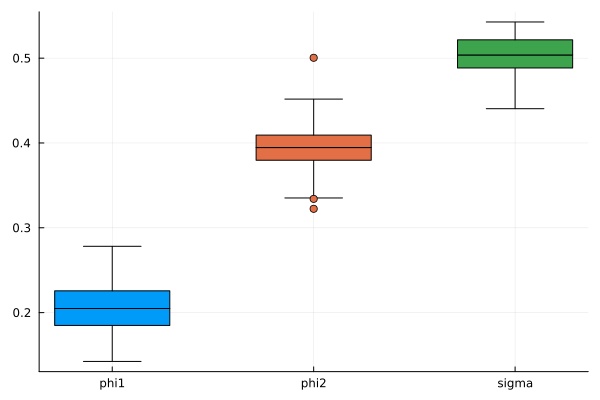

In [17]:
plot()
Name=["phi1","phi2","sigma"]
for i in 1:3
    boxplot!([Name[i]],res[:,i])
end
plot!(leg=false)

# Zad 2

In [5]:
φ₁=0.2
φ₂=0.4
σ²=0.5
N=1000
M=1000

1000

In [6]:
γ(X,h)=begin
    n=length(X)
    x=mean(X)
    sum(@. (X[h+1:end]-x)*(X[1:n-h]-x) )/n
end

γ (generic function with 1 method)

In [7]:
?arfima

search: arfima ARFIMA



```
arfima([rng,] N, σ, d, φ=nothing, θ=nothing) -> Xₜ
```

Create a stochastic timeseries of length `N` that follows the ARFIMA process, or any of its subclasses, like e.g. ARMA, AR, ARIMA, etc., see below. `σ` is the standard deviation of the white noise used to generate the process. The first optional argument is an `AbstractRNG`, a random number generator to establish reproducibility.

The generating equation for `Xₜ` is:

$$
\left( 1 - \sum_{i=1}^p \phi_i B^i \right)
\left( 1-B \right)^d X_t
=
\left( 1 + \sum_{i=1}^q \theta_i B^i \right) \varepsilon_t
$$

with $B$ the backshift operator and $\varepsilon_t$ white noise.

This equation encapsulates all possible variants of ARFIMA and Julia's multiple dispatch system decides which will be the simulated variant, based on the types of `d, φ, θ`.

## Variants

The ARFIMA parameters are (p, d, q) with `p = length(φ)` and `q = length(θ)`, with `p, q` describing the autoregressive or moving average "orders" while `d` is the differencing "order". Both `φ, θ` can be of two types: `Nothing` or `SVector`. If they are `Nothing` the corresponding components of autoregressive (φ) and moving average (θ) are not done. Otherwise, the static vectors simply contain their values.

If `d` is `Nothing`, then the differencing (integrated) part is not done and the process is in fact AR/MA/ARMA. If `d` is of type `Int`, then the simulated process is in fact ARIMA, while if `d` is `AbstractFloat` then the process is AR**F**IMA. In the last case it must hold that `d ∈ (-0.5, 0.5)`. If all `d, φ, θ` are `nothing`, white noise is returned.

The function `arma(N, σ, φ, θ = nothing)` is provided for convienience.

## Examples

```julia
N, σ = 10_000, 0.5
arfima(N, σ, 0.4)                                   # ARFIMA(0,d,0)
arfima(N, σ, 0.4, SVector(0.8))                     # ARFIMA(1,d,0)
arfima(N, σ, 1, SVector(0.8))                       # ARIMA(1,d,0)
arfima(N, σ, 1, SVector(0.8), SVector(1.2))         # ARIMA(1,d,1)
arfima(N, σ, 0.4, SVector(0.8), SVector(1.2))       # ARFIMA(1,d,1)
arfima(N, σ, nothing, SVector(0.8))                 # AR(1)
arfima(N, σ, nothing, nothing, SVector(1.2))        # MA(1)
arfima(N, σ, nothing, SVector(0.8), SVector(1.2))   # ARMA(1,1)
```


In [8]:
X = arfima(N, √σ², nothing, SVector(φ₁)); # ARFIMA(2,0,0)

In [9]:
Φ=zeros(M,2)
for i in 1:M
    X = arfima(N, √σ², nothing, SVector(φ₁))
    Φ[i,1]=sum(@. X[2:end]*X[1:end-1])/sum(X .^2)
    Φ[i,2]=γ(X,1)/γ(X,0)
end

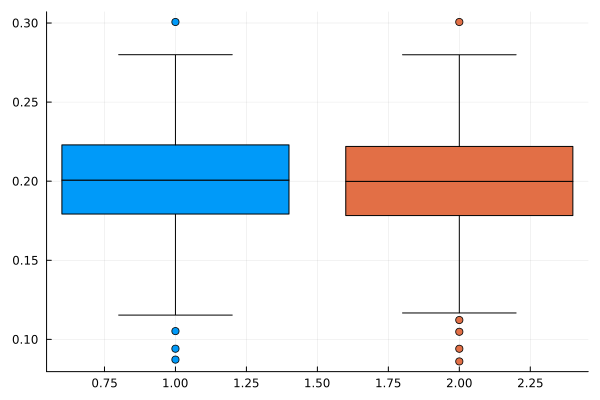

In [10]:
plot(leg=false)
boxplot!(Φ[:,1])
boxplot!(Φ[:,2])

# Zad 3

In [11]:
N=1000
M=100
θ=0.5
σ=1

1

In [12]:
A=zeros(M,N);

In [13]:
for i in 1:M
    A[i,:]=arfima(N, σ, nothing, nothing, SVector(-θ)) # ARFIMA(0,0,1)
end

In [14]:
γₚ=zeros(M,21)
for i in 1:M
    γₚ[i,:]=pacf(A[i,:],0:20)
end

In [15]:
γₜ(h)= h==0 ? 1 : -(-θ)^h/sum(θ^(2i) for i in 0:h)

γₜ (generic function with 1 method)

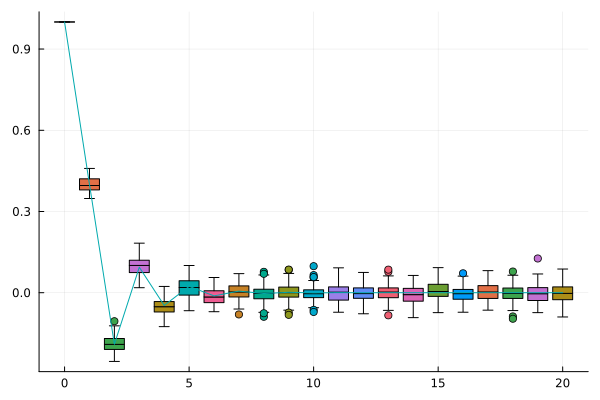

In [16]:
plot(leg=false)
for i in 0:20
    boxplot!(0:20,γₚ[:,i+1])
end
plot!(0:20, h->γₜ(h))

In [17]:
Γₚ=zeros(2,21)
for i in 1:21
    Γₚ[1,i]=quantile(γₚ[:,i],0.75)
    Γₚ[2,i]=quantile(γₚ[:,i],0.25)
end

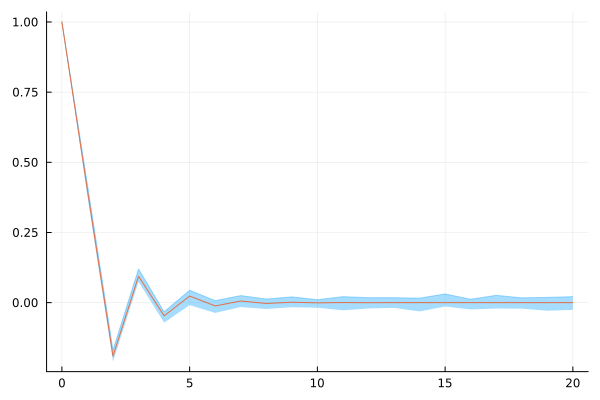

In [18]:
plot(leg=false)
plot!(0:20,Γₚ[1,:],fillrange=Γₚ[2,:],alpha=0.35)
plot!(0:20,h->γₜ(h))

# Zad 4

In [19]:
N=1000
M=1000
φ₁=0.2
φ₂=0.4
φ=[φ₁,φ₂]
σ=1

1

In [20]:
A=zeros(M,N)
for i in 1:M
    A[i,:]=arfima(N,σ,nothing,SVector(φ...))
end

In [21]:
γⱼ=pacf(A,0:20,method=:yulewalker);

In [22]:
γₜ(h)=begin
    if h==0
        return γₜ(1)*(1-φ₂)/φ₁
    elseif h==1
        return σ^2*φ₁/(1-φ₂-φ₁^2-φ₁^2*φ₂-φ₂^2*(1-φ₂))
    else
        return φ₁*γₜ(h-1)+φ₂*γₜ(h-2)
    end
end

γₜ (generic function with 1 method)

In [23]:
γτ=[mean(γ(A[i,:],h) for i in 1:M) for h in 0:20];

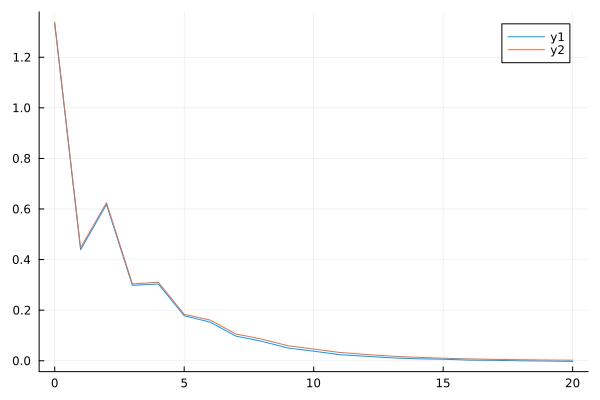

In [24]:
plot(0:20,γτ)
plot!(0:20, h->γₜ(h))

# Zad 5

In [238]:
N=1000
φ=[0.8,-0.4,0.2,-0.1]
σ=1

1

In [239]:
pˢ=0:10

0:10

In [240]:
σ̂=dla danego modelu

1

In [242]:
FPE=[σ̂*(N+p)/(N-p) for p in pˢ]
p=pˢ[argmin(FPE)]

0

Estymacja modelu dla p